<a href="https://colab.research.google.com/github/MdZashil/Wideband_Channel_Estimation_using_GAN/blob/main/Wideband_Channel_Estimation_using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sionna

INFO: pip is looking at multiple versions of ipywidgets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of ipywidgets to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.7 MB/s eta 0:

In [ ]:
pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.1
    Uninstalling tensorflow-2.15.1:
      Successfully uninstalled tensorflow-2.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tensorstore 0.1.72 requires m

In [ ]:
pip install sionna

In [ ]:
pip show tensorflow keras sionna

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, sionna, tensorflow-text, tf_keras
---
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: tensorflow
---
Name: sionna
Version: 0.19.2
Summary: Sionna -- A TensorFlow-based open-source library for simulating the physical layer of wirele

-----------------------------------------------------

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Keep this to reduce TensorFlow logging

import sionna as sn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Avoid warnings from TensorFlow
tf.get_logger().setLevel('ERROR')

%matplotlib inline


In [ ]:
from sionna.ofdm import ResourceGrid
from sionna.channel.tr38901 import AntennaArray, CDL, Antenna, PanelArray
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel

In [ ]:
DS = 10e-9 # Delay spread
CF = 3.5e9 # Carrier frequency
num_tx = 8# Number of transmitters
num_rx  = 4 # Number of recievers

In [ ]:
bs_array = PanelArray(num_rows_per_panel = 1,num_cols_per_panel = num_tx, polarization = 'single', polarization_type = 'V',
                      antenna_pattern = 'omni', carrier_frequency = CF)
ut_array = PanelArray(num_rows_per_panel = 1, num_cols_per_panel = num_rx, polarization = 'single', polarization_type = 'V',
                      antenna_pattern = 'omni',carrier_frequency = CF)

rg = ResourceGrid(num_ofdm_symbols=1,fft_size=1024,subcarrier_spacing=15e3)
cdl = CDL(model="E", delay_spread=DS, carrier_frequency=CF, ut_array = ut_array, bs_array = bs_array, direction = 'uplink')
cir_a, cir_tau = cdl(batch_size=1, num_time_steps=1,sampling_frequency=rg.bandwidth)
l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
l_tot = l_max-l_min+1
h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=3, normalize=True)


In [ ]:
tx=8
rx=4
lc=4
Nf=8

In [ ]:
def create_padded_circulant_matrix(C_values, N_f):

    block_shape = C_values[0].shape

    num_given_C = len(C_values)


    zero_matrix = np.zeros(block_shape, dtype=complex)

    C_values_list = [C_values[i] for i in range(num_given_C)]
    padded_C_values = C_values_list + [zero_matrix] * (N_f - num_given_C)

    row_blocks = []
    for i in range(N_f):
        row = []
        for j in range(N_f):

            row.append(padded_C_values[(i - j) % N_f])

        row_blocks.append(np.hstack(row))

    circulant_matrix = np.vstack(row_blocks)

    return circulant_matrix

In [ ]:
C_values=np.zeros((lc,rx,tx),dtype=complex)

for k in range(tx):
  for j in range(rx):
    for i in range(lc):
      C_values[i][j][k] = h_time[0][0][k][0][j][0][i]

N_f = Nf

C_matrix = create_padded_circulant_matrix(C_values, N_f)

In [ ]:
#Defining Parametres
Ns = 8
NtRF = 8
Nf = 8
Nt=8
Nr=4
NrRF=4

In [ ]:
def generate_sn():
  p_nk = (np.random.randn(Ns, 1) + 1j * np.random.randn(Ns, 1)) / np.sqrt(Ns)
  FBB_nk = [np.eye(NtRF, Ns) for _ in range(Nf)]

  s_nk = [np.dot(FBB_nk[k], p_nk) for k in range(Nf)]
  s_n = np.concatenate(s_nk, axis=0)
  return s_n

In [ ]:
#Function to generate noise and signal power

def calculate_signal_power(signal):
    # Calculate the power of a complex or real signal
    power = np.mean(np.abs(signal) ** 2)
    return power

def generate_noise(snr_dB, signal_power, dim):
    # Calculate noise power from SNR
    noise_power = signal_power / (10 ** (snr_dB / 10))
    sigma_n = np.sqrt(noise_power)  # Standard deviation for noise

    # Generate complex noise with the calculated noise standard deviation
    noise = sigma_n * (np.random.randn(dim, 1) + 1j * np.random.randn(dim, 1))
    return noise

In [ ]:
#To get H

# Generate the DFT matrix
F = np.array([[np.exp(-2j * np.pi * m * n / Nf) for n in range(Nf)] for m in range(Nf)])
I_Nr_RF = np.eye(NrRF)
F_kron_INrRF=np.kron(F,I_Nr_RF);
F = np.fft.fft(np.eye(Nf))
FH = np.conj(F) / np.sqrt(Nf)

INRF_t = np.eye(NtRF)
FH_kron_INRF_t = np.kron(FH, INRF_t)

H = np.dot(F_kron_INrRF,C_matrix)
H = np.dot(H,FH_kron_INRF_t)

In [ ]:
# Define the set for phase values
Nr=4
NrRF=4
A = [0, np.pi]

# Generate W_RF with elements [W_RF]_{i,j} = √(1/Nr) * e^(j * φ_{i,j}), where φ_{i,j} ∈ {0, π}
W_RF = np.sqrt(1/ Nr) * np.exp(1j * np.random.choice(A, (Nr, NrRF)))
I_Nf= np.eye(Nf)
I_Nf_kro_W_RF = np.kron(I_Nf, W_RF)

FRF = np.sqrt(1 / Nt) * np.exp(1j * np.random.choice(A, (Nt, NtRF)))
I_NF = np.eye(Nf)

I_NF_kro_FRF = np.kron(I_NF, FRF)


In [ ]:
#Get H[k] from H matrix
H_k_list = []
for k in range(Nf):
    row_start = k * Nr
    row_end = (k + 1) * Nr
    col_start = k * Nt
    col_end = (k + 1) * Nt
    H_k = H[row_start:row_end, col_start:col_end]
    H_k_list.append(H_k)

In [ ]:
#old co
#Get Sn[k] from Sn
s_n_k_list_1 = []
s_n_1 = generate_sn()
for k in range(Nf):
    start_index = k * NtRF
    end_index = (k + 1) * NtRF
    s_n_k = s_n_1[start_index:end_index]
    s_n_k_list_1.append(s_n_k)

In [ ]:
#to get signal power
rho=1
y_actual = np.sqrt(rho) * (W_RF.conj().T @ H_k_list[0] @ FRF @ s_n_k_list_1[0])
signal_power = calculate_signal_power(y_actual)

In [ ]:
print(y_actual)

[[ 4.44460778-3.91602441j]
 [ 3.58211859-4.79833383j]
 [ 4.44460778-3.91602441j]
 [-5.07256709+4.13959991j]]


In [ ]:
# snr = 8
# w_k_list = []
# v_k = generate_noise(snr,signal_power,32)
# w_k = np.dot(I_Nf_kro_W_RF,F_kron_INrRF)
# w_k_list = np.dot(w_k,v_k)

In [ ]:
# y_k_list = []
# for k in range(Nf):
#   H_k_n = H_k_list[k]
#   s_k_n = s_n_k_list[k]
#   w_k_n = w_k_list[k]
#   y_k = np.sqrt(rho) * (W_RF.conj().T @ H_k_n @ FRF @ s_k_n) + w_k_n
#   y_k_list.append(y_k)

In [ ]:
N_p = 16

In [ ]:
def calculate_nmse_db(h, h_hat):

    error_norm_squared = np.linalg.norm(h - h_hat) ** 2

    true_norm_squared = np.linalg.norm(h) ** 2
    # Calculate NMSE
    nmse = error_norm_squared / true_norm_squared
    # Convert NMSE to dB
    nmse_db = 10 * np.log10(nmse)
    return nmse_db

In [ ]:
snr_range=[-5,-2.5,-0,2.5,5]
nmse_array = []
for snr in snr_range:
  w_k_list = []
  v_k = generate_noise(snr,signal_power,32)
  w_k = np.dot(I_Nf_kro_W_RF,F_kron_INrRF)
  w_k_list = np.dot(w_k,v_k)
  H_np_estimated_list = []
  for x in range(N_p):
    H_estimated_list = []
    y_k_list = []
    s_n_k_list = []
    s_n = generate_sn()

    for k in range(Nf):
      start_index = k * NtRF
      end_index = (k + 1) * NtRF
      s_n_k = s_n[start_index:end_index]
      s_n_k_list.append(s_n_k)
    for k in range(Nf):
      H_k_n = H_k_list[k]
      # print(H_k_n.shape)
      s_k_n = s_n_k_list[k]
      w_k_n = w_k_list[k]
      # print(w_k_n.shape)
      y_k = np.sqrt(rho) * (W_RF.conj().T @ H_k_n @ FRF @ s_k_n) + w_k_n
      y_k_list.append(y_k)

    for k in range(Nf):
      y_k_ls = y_k_list[k]  # Observed signal
      w_k_ls = w_k_list[k]  # Noise vector
      s_k_ls = s_n_k_list[k]  # Transmitted signal
      #estimate H
      #noise for 5db
      a=W_RF.conj().T
      b=FRF @ s_k_ls
      a_inv = np.linalg.pinv(a)  # Pseudoinverse of a
      b_inv = np.linalg.pinv(b)
      h_k=np.dot(np.dot(a_inv, y_k_ls), b_inv)
      H_estimated_list.append(h_k)
    H_estimated_list=np.vstack(H_estimated_list)
    H_np_estimated_list.append(H_estimated_list)
  H_np_estimated_list= np.vstack(H_np_estimated_list)
  H_np_k_list =np.vstack(H_k_list)
  H_np_k_list = np.vstack([H_np_k_list for _ in range(N_p)])
  nmse=calculate_nmse_db(H_np_k_list,H_np_estimated_list)
  nmse_array.append(nmse)


In [ ]:
print(H_np_estimated_list.shape)

(512, 8)


In [ ]:
print(y_k_list)

[array([[-15.26724396-14.51723788j],
       [-10.91386838-13.78628406j],
       [-15.26724396-14.51723788j],
       [-14.54956084-18.5058441j ]]), array([[-4.51546451+2.54855734j],
       [-1.18248928+3.10668019j],
       [-4.51546451+2.54855734j],
       [-4.94182779-2.31890357j]]), array([[-2.27575887-2.67994433j],
       [ 1.93672351-2.28443515j],
       [-2.27575887-2.67994433j],
       [-3.03827432-6.33369321j]]), array([[-10.40995133-11.11505359j],
       [ -7.66489358-12.3787481j ],
       [-10.40995133-11.11505359j],
       [-10.50819362-15.39430332j]]), array([[8.49287625 -7.82951928j],
       [9.52841103 -6.96352181j],
       [8.49287625 -7.82951928j],
       [6.95185289-11.92635264j]]), array([[18.5137057 +2.24641718j],
       [21.31070895+4.1134033j ],
       [18.5137057 +2.24641718j],
       [17.80305965-0.21347936j]]), array([[-8.76239037-2.74882038j],
       [-6.01673659-1.46028871j],
       [-8.76239037-2.74882038j],
       [-8.37880211-6.10875986j]]), array([[-3.735010

In [ ]:
y2=np.vstack(y_k_list)
print(y2.shape)

(32, 1)


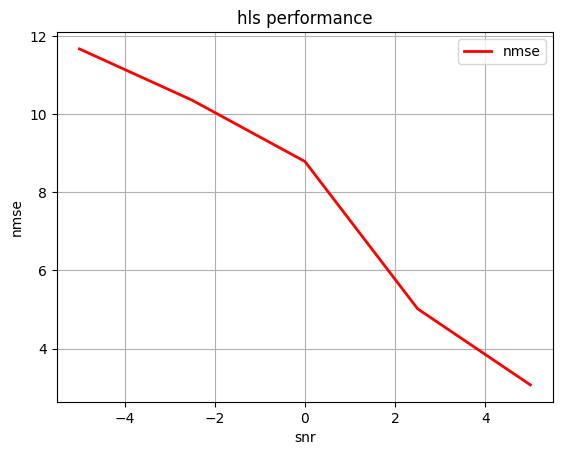

In [ ]:
import matplotlib.pyplot as plt

plt.plot(snr_range, nmse_array, label='nmse', color='r', linewidth=2)
plt.xlabel('snr')
plt.ylabel('nmse')
plt.title('hls performance')
plt.legend()

# Displaying the grid
plt.grid(True)

# Show the plot
plt.show()

#GAN Implementation


In [ ]:
#Channel Generation
h_matrix = []

for b in range(3000):
  bs_array = PanelArray(num_rows_per_panel = 1,num_cols_per_panel = num_tx, polarization = 'single', polarization_type = 'V',
                      antenna_pattern = 'omni', carrier_frequency = CF)
  ut_array = PanelArray(num_rows_per_panel = 1, num_cols_per_panel = num_rx, polarization = 'single', polarization_type = 'V',
                      antenna_pattern = 'omni',carrier_frequency = CF)
  h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=3, normalize=True)
  rg = ResourceGrid(num_ofdm_symbols=1,fft_size=1024,subcarrier_spacing=15e3)
  cdl = CDL(model="E", delay_spread=DS, carrier_frequency=CF, ut_array = ut_array, bs_array = bs_array, direction = 'uplink')
  cir_a, cir_tau = cdl(batch_size=1, num_time_steps=1,sampling_frequency=rg.bandwidth)
  l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
  l_tot = l_max-l_min+1
  h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=3, normalize=True)
  C_values=np.zeros((lc,rx,tx),dtype=complex)
  for k in range(tx):
    for j in range(rx):
      for i in range(lc):
        C_values[i][j][k] = h_time[0][0][k][0][j][0][i]

  N_f = Nf

  C_matrix = create_padded_circulant_matrix(C_values, N_f)

  print(h_time[0][0][0][0][0][0][0])
  H = np.dot(F_kron_INrRF,C_matrix)
  H = np.dot(H,FH_kron_INRF_t)
  print("Channel",b+1,"generated")

  h_matrix.append(H)

tf.Tensor((1.1590788+0.19118968j), shape=(), dtype=complex64)
Channel 1 generated
tf.Tensor((0.5226029-0.18931414j), shape=(), dtype=complex64)
Channel 2 generated
tf.Tensor((1.217773-0.07074353j), shape=(), dtype=complex64)
Channel 3 generated
tf.Tensor((0.70067286-0.1834729j), shape=(), dtype=complex64)
Channel 4 generated
tf.Tensor((0.5469364+0.22542551j), shape=(), dtype=complex64)
Channel 5 generated
tf.Tensor((0.96458143+0.25120157j), shape=(), dtype=complex64)
Channel 6 generated
tf.Tensor((0.98805606+0.22837429j), shape=(), dtype=complex64)
Channel 7 generated
tf.Tensor((1.1833925+0.10506271j), shape=(), dtype=complex64)
Channel 8 generated
tf.Tensor((1.1685258+0.08795j), shape=(), dtype=complex64)
Channel 9 generated
tf.Tensor((0.9937526+0.3495748j), shape=(), dtype=complex64)
Channel 10 generated
tf.Tensor((1.2071034+0.48305282j), shape=(), dtype=complex64)
Channel 11 generated
tf.Tensor((0.7534204-0.10902959j), shape=(), dtype=complex64)
Channel 12 generated
tf.Tensor((1.064

In [ ]:
print(H.shape)

(32, 64)


In [ ]:
import tensorflow as tf

def build_discriminator(input_shape):
    model = tf.keras.Sequential()

    # Input layer with Conv2D, LeakyReLU, and Dropout
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))

    # Hidden Layer 1
    model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))

    # Hidden Layer 2
    model.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))

    # Hidden Layer 3
    model.add(tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.25))

    # Fully connected layer for output
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

# Example usage
# input_shape = (Nf*Nr, Nf*Nt, 2)  # Adjust shape as needed for your complex 2D channel matrix input
# discriminator = build_discriminator(input_shape)
# discriminator.summary()


In [ ]:
import tensorflow as tf

def build_generator(latent_dim, output_shape=(32, 64, 2)):
    model = tf.keras.Sequential()

    # First layer: Fully connected to reshape the latent vector
    model.add(tf.keras.layers.Dense(8 * 16 * 256, input_dim=latent_dim))
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Reshape((8, 16, 256)))  # Reshape to 3D tensor

    # Upsampling layers to reach (32, 64) output shape
    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(128, kernel_size=(4, 4), strides=(1, 1), padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())

    model.add(tf.keras.layers.UpSampling2D())
    model.add(tf.keras.layers.Conv2D(64, kernel_size=(4, 4), strides=(1, 1), padding="same"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())

    # Output layer: (32, 64, 2) with real and imaginary parts as separate channels
    model.add(tf.keras.layers.Conv2D(output_shape[-1], kernel_size=(3, 3), strides=(1, 1), padding="same", activation="linear"))

    return model

# Example usage:
# latent_dim = 100  # Size of the input latent vector
# generator = build_generator(latent_dim)
# generator.summary()


In [ ]:
batch_size = 200
latent_dim = 15
epochs = 3000
n_critic = 5
alpha = 0.0001
clip_value = 0.01

In [ ]:
import tensorflow as tf
import numpy as np


def real_channel_data_loader(batch_size, real_channel_data):
    data_size = len(real_channel_data)
    indices = np.arange(data_size)

    while True:
        np.random.shuffle(indices)

        for start_idx in range(0, data_size, batch_size):
            end_idx = min(start_idx + batch_size, data_size)
            batch_indices = indices[start_idx:end_idx]

            batch = np.array([np.stack([real_channel_data[i].real, real_channel_data[i].imag], axis=-1) for i in batch_indices])

            yield batch

real_channel_data = h_matrix
real_channel_loader = real_channel_data_loader(batch_size, real_channel_data)



# Loss functions
def discriminator_loss(real_output, fake_output):
    return -tf.reduce_mean(real_output) + tf.reduce_mean(fake_output)

def generator_loss(fake_output):
    return -tf.reduce_mean(fake_output)

# Training loop
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape=(32, 64, 2))
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

@tf.function
def train_step(real_channels):
    random_noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape(persistent=True) as tape:



        generated_channels = generator(random_noise, training=True)

        real_output = discriminator(real_channels, training=True)
        fake_output = discriminator(generated_channels, training=True)

        generated_channels = generator(random_noise, training=True)

        real_output = discriminator(real_channels, training=True)

        fake_output = discriminator(generated_channels, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    del tape
    return disc_loss, gen_loss

Epoch 0, Discriminator Loss: -0.1028059720993042, Generator Loss: -0.386168897151947
Epoch 1, Discriminator Loss: -0.43493592739105225, Generator Loss: -0.43317997455596924
Epoch 2, Discriminator Loss: -0.5630331039428711, Generator Loss: -0.41824790835380554
Epoch 3, Discriminator Loss: -0.6050915718078613, Generator Loss: -0.3887048661708832
Epoch 4, Discriminator Loss: -0.6362903714179993, Generator Loss: -0.360797643661499
Epoch 5, Discriminator Loss: -0.6890558004379272, Generator Loss: -0.309407502412796
Epoch 6, Discriminator Loss: -0.7224874496459961, Generator Loss: -0.2759157419204712
Epoch 7, Discriminator Loss: -0.7471258640289307, Generator Loss: -0.2518554627895355
Epoch 8, Discriminator Loss: -0.7874643206596375, Generator Loss: -0.21134354174137115
Epoch 9, Discriminator Loss: -0.8165727853775024, Generator Loss: -0.18196310102939606
Epoch 10, Discriminator Loss: -0.8954426050186157, Generator Loss: -0.10287941247224808
Epoch 11, Discriminator Loss: -0.9088016748428345,

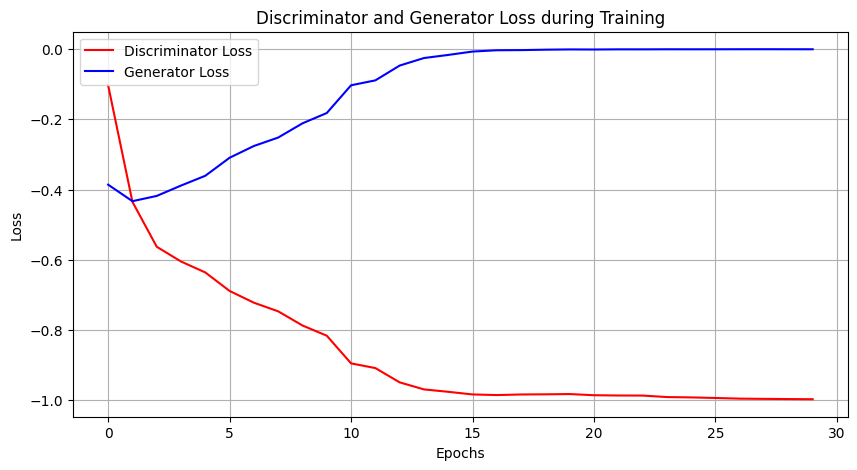

In [ ]:
# for epoch in range(epochs):
#     real_channels = next(real_channel_loader)
#     d_loss, g_loss = train_step(real_channels)

#     print(f"Epoch {epoch}, Discriminator Loss: {d_loss.numpy()}, Generator Loss: {g_loss.numpy()}")
d_losses = []
g_losses = []
for epoch in range(epochs):
    real_channels = next(real_channel_loader)  # Assuming real_channel_loader is defined
    d_loss, g_loss = train_step(real_channels)  # train_step should return both losses

    # Store losses for plotting
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    print(f"Epoch {epoch}, Discriminator Loss: {d_loss.numpy()}, Generator Loss: {g_loss.numpy()}")

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), d_losses, label='Discriminator Loss', color='red')
plt.plot(range(epochs), g_losses, label='Generator Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Loss during Training')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
h = H.reshape(-1,1)

In [ ]:
print(h.shape)

(2048, 1)


In [ ]:
#dont run
import tensorflow as tf
import numpy as np

def loss_fn(y, generated_h, A, rho):
    rho = tf.cast(rho, dtype=tf.complex128)
    measured_h = tf.sqrt(rho) * tf.matmul(A, generated_h)
    loss = tf.reduce_mean(tf.square(y - measured_h))
    return loss

def online_training(y_actual,A_actual):
  latent_dim = 15
  learning_rate = 0.01
  num_iterations = 100
  rho = 1.0

  z = tf.Variable(tf.random.normal([1, latent_dim]), trainable=True)

  z_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  for i in range(num_iterations):
      with tf.GradientTape() as tape:
          generated_h = generator(z, training=False)
          generated_h_flat = tf.reshape(generated_h, (1, 2048, 2))

          generated_h_complex = tf.complex(generated_h_flat[..., 0], generated_h_flat[..., 1])

          generated_h_final = tf.reshape(generated_h_complex, (2048, 1))  # Shape: (2048, 1)

          generated_h = generated_h_final
          generated_h = tf.cast(generated_h, tf.complex128)
          loss = loss_fn(y_actual, generated_h, A_actual, rho)

      gradients = tape.gradient(loss, [z])

      z_optimizer.apply_gradients(zip(gradients, [z]))

      if i % 10 == 0:
          print(f"Iteration {i}, Loss: {loss.numpy()}")

  h_hat_GAN = generator(z, training=False)

  h_hat_GAN_flat = tf.reshape(h_hat_GAN, (1, 2048, 2))  # Shape: (1, 2048, 2)

  h_hat_GAN_complex = tf.complex(h_hat_GAN_flat[..., 0], h_hat_GAN_flat[..., 1])  # Shape: (1, 2048)

  h_hat_GAN_final = tf.reshape(h_hat_GAN_complex, (2048, 1))  # Shape: (2048, 1)
  return h_hat_GAN_final

In [ ]:
#for multiple symbols
import tensorflow as tf
import numpy as np

def loss_fn(Y_actual, generated_H, A_actual, rho):
    rho = tf.cast(rho, dtype=tf.complex128)
    measured_H = tf.sqrt(rho) * tf.matmul(tf.cast(A_actual, tf.complex128), tf.cast(generated_H, tf.complex128))
    loss = tf.reduce_mean(tf.square(Y_actual - measured_H))
    return loss

def online_training(Y_actual, A_actual, num_symbols):
    latent_dim = 15
    learning_rate = 0.01
    num_iterations = 100
    rho = 1.0

    # Initialize separate latent vectors for each symbol
    Z = tf.Variable(tf.random.normal([num_symbols, latent_dim]), trainable=True)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            generated_H = generator(Z, training=False)
            generated_H_flat = tf.reshape(generated_H, (num_symbols, 2048, 2))

            generated_H_complex = tf.complex(generated_H_flat[..., 0], generated_H_flat[..., 1])

            generated_H_final = tf.reshape(generated_H_complex, (num_symbols, 2048, 1))  # Shape: (num_symbols, 2048, 1)

            loss = loss_fn(Y_actual, generated_H_final, A_actual, rho)

        gradients = tape.gradient(loss, [Z])
        optimizer.apply_gradients(zip(gradients, [Z]))

        if i % 10 == 0:
            print(f"Iteration {i}, Loss: {loss.numpy()}")

    # Final estimated channel matrix
    H_hat_GAN = generator(Z, training=False)
    H_hat_GAN_flat = tf.reshape(H_hat_GAN, (num_symbols, 2048, 2))
    H_hat_GAN_complex = tf.complex(H_hat_GAN_flat[..., 0], H_hat_GAN_flat[..., 1])
    H_hat_GAN_final = tf.reshape(H_hat_GAN_complex, (num_symbols, 2048, 1))

    return H_hat_GAN_final


In [ ]:
def generate_A(Ns,NtRF,Nf,Nt):
    A=[0,np.pi]
    p_nk = (np.random.randn(Ns, 1) + 1j * np.random.randn(Ns, 1)) / np.sqrt(Ns)
    FBB_nk = [np.eye(NtRF, Ns) for _ in range(Nf)]
    s_nk = [np.dot(FBB_nk[k], p_nk) for k in range(Nf)]
    s_n = np.concatenate(s_nk, axis=0)
    FRF = np.sqrt(1 / Nt) * np.exp(1j * np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2], (Nt, NtRF)))
    I_NF = np.eye(Nf)

    # Generate W_RF with elements [W_RF]_{i,j} = √(1/Nr) * e^(j * φ_{i,j}), where φ_{i,j} ∈ {0, π}
    W_RF = np.sqrt(1/ Nr) * np.exp(1j * np.random.choice(A, (Nr, NrRF)))
    I_Nf= np.eye(Nf)
    I_Nf_kro_W_RF = np.kron(I_Nf, W_RF)

    I_NF_kro_FRF = np.kron(I_NF, FRF)

    A = np.dot(s_n.T, I_NF_kro_FRF)
    A=np.kron(A,I_Nf_kro_W_RF)
    return A

In [ ]:
A_actual = generate_A(Ns,NtRF,Nf,Nt)

In [ ]:
num_symbols = 50  #10 symbols
H_hat_GAN_final = online_training(y2, A_actual, num_symbols)
print(H_hat_GAN_final.shape)

Iteration 0, Loss: (35.843313249706505+90.31004505956564j)
Iteration 10, Loss: (35.340117183623164+90.06523098064582j)
Iteration 20, Loss: (34.82561123703238+89.81204983780236j)
Iteration 30, Loss: (34.29831043962267+89.5500997465594j)
Iteration 40, Loss: (33.76206090185993+89.27863286761712j)
Iteration 50, Loss: (33.21925951155045+88.99915177172727j)
Iteration 60, Loss: (32.67242021844287+88.70800451423936j)
Iteration 70, Loss: (32.11963367834792+88.40360579626308j)
Iteration 80, Loss: (31.562381713573796+88.09011605615088j)
Iteration 90, Loss: (31.00870279391412+87.76476254708697j)
(50, 2048, 1)


In [ ]:
snr_range=[0,2.5,5,7.5,10] #7.5,10,12.5,15]

In [ ]:
from sionna.ofdm import ResourceGrid
from sionna.channel.tr38901 import AntennaArray, CDL, Antenna, PanelArray
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel

In [ ]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

In [ ]:
h_actual = H.reshape(-1, 1)

In [ ]:
nmse_GAN_array=[]

for snr in snr_range:
  v_n=generate_noise(snr,signal_power,32)
  w_n=np.dot(I_Nf_kro_W_RF,F_kron_INrRF)
  w_n=np.dot(w_n,v_n)

  #w=np.tile(w_n,(N_p,1))

  y_snr = y2 + w_n #changed from y=y+w

  #ls NMSE

  lambda_reg = 5e-5
  rho=1
  A_H = A_actual.conj().T
  x = np.dot(A_H, A_actual) + lambda_reg * np.eye(A_actual.shape[1])
  rhs = np.dot(A_H, y_snr)
  x_sparse = csc_matrix(x)

  # h_ls = spsolve(x_sparse, rhs)
  # nmse_ls=calculate_nmse_db(h_actual,h_ls) #important
  # print(nmse_ls)

  #GAN NMSE
  print("SNR: ",snr)
  h_hat_GAN_final = online_training(y2,A_actual,num_symbols)
  nmse_GAN_array_temp = [calculate_nmse_db(h_actual, h_hat_GAN_final[i]) for i in range(num_symbols)]
  nmse_GAN = np.median(nmse_GAN_array_temp)  # Take the average NMSE over symbols
  print(nmse_GAN)
  nmse_GAN_array.append(nmse_GAN)

SNR:  0
Iteration 0, Loss: (35.680680185337444+90.2778087949198j)
Iteration 10, Loss: (35.17628601979812+90.02570529166387j)
Iteration 20, Loss: (34.65879464453594+89.76119473603198j)
Iteration 30, Loss: (34.13430192661429+89.48648262593674j)
Iteration 40, Loss: (33.60365287267167+89.1993981342547j)
Iteration 50, Loss: (33.06638414483479+88.90337573729079j)
Iteration 60, Loss: (32.5242317035686+88.59846685801513j)
Iteration 70, Loss: (31.982998284968144+88.28561929322719j)
Iteration 80, Loss: (31.44369159713374+87.96141378878372j)
Iteration 90, Loss: (30.907513500397318+87.62844403949228j)
-0.0810493552972007
SNR:  2.5
Iteration 0, Loss: (36.053770671122585+90.3649498692191j)
Iteration 10, Loss: (35.54290049390113+90.08726770918632j)
Iteration 20, Loss: (35.01903954811123+89.79919271343302j)
Iteration 30, Loss: (34.48997391037486+89.50959551009248j)
Iteration 40, Loss: (33.959570303204856+89.21620968349883j)
Iteration 50, Loss: (33.426586599582826+88.91677931462274j)
Iteration 60, Loss

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(snr_range, nmse_ls_array, label='nmse_ls', color='r', linewidth=2)
# plt.xlabel('snr')
# plt.ylabel('nmse')
# plt.title('hls performance')
# plt.legend()
# plt.grid(True)

# plt.show()

LOSS CURVE

In [ ]:
loss_GAN_array = []  # Store the loss for each SNR

for snr in snr_range:
    v_n = generate_noise(snr, signal_power, 32)
    w_n = np.dot(I_Nf_kro_W_RF, F_kron_INrRF)
    w_n = np.dot(w_n, v_n)
    y_snr = y2 + w_n  # Noisy received signal

    # Solve for GAN-based estimation
    h_hat_GAN_final, loss_GAN = online_training(y_snr, A_actual, num_symbols, return_loss=True)

    # Store median NMSE
    nmse_GAN = np.median([calculate_nmse_db(h_actual, h_hat_GAN_final[i]) for i in range(num_symbols)])
    nmse_GAN_array.append(nmse_GAN)

    # Store final loss at each SNR
    loss_GAN_array.append(np.median(loss_GAN))

# Now you can plot loss_GAN_array vs. snr_range


In [ ]:
import matplotlib.pyplot as plt

plt.plot(snr_range, loss_GAN_array, marker='o', label="GAN Online Loss")
plt.xlabel("SNR (dB)")
plt.ylabel("Loss")
plt.title("GAN Online Optimization Loss vs SNR")
plt.legend()
plt.grid()
plt.show()

NameError: name 'loss_GAN_array' is not defined

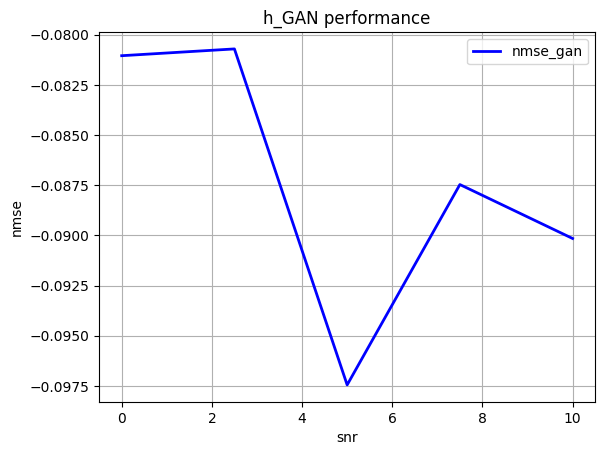

In [ ]:
plt.plot(snr_range, nmse_GAN_array, label='nmse_gan', color='b', linewidth=2)

plt.xlabel('snr')
plt.ylabel('nmse')
plt.title('h_GAN performance')
plt.legend()

# Displaying the grid
plt.grid(True)
plt.show()

In [ ]:
plt.plot(snr_range, nmse_array, label='nmse_ls', color='r', linewidth=2)
plt.plot(snr_range, nmse_GAN_array, label='nmse_gan', color='b', linewidth=2)

plt.xlabel('snr')
plt.ylabel('nmse')
plt.title('h_GAN performance')
plt.legend()

# Displaying the grid
plt.grid(True)
plt.show()

In [ ]:
print(h_actual.shape)
print(h_hat_GAN_final.shape)

(2048, 1)
(50, 2048, 1)


RESNET


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

RESNET MODEL

GENERATING CHANNELS

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np

In [ ]:
tx=8
rx=4
lc=4
Nf=8

In [ ]:
#Defining Parametres
Ns = 8
NtRF = 8
Nf = 8
Nt=8
Nr=4
NrRF=4

In [ ]:
print(y2.shape)

(32, 1)


In [ ]:
print(y_noisy_real.shape)

(32, 1)


In [ ]:
print(y_noisy_imag.shape)

(32, 1)


In [ ]:
print(y_noisy_reshaped.shape)

(32, 2, 1)


In [ ]:
def generate_A(Ns,NtRF,Nf,Nt):
    A=[0,np.pi]
    p_nk = (np.random.randn(Ns, 1) + 1j * np.random.randn(Ns, 1)) / np.sqrt(Ns)
    FBB_nk = [np.eye(NtRF, Ns) for _ in range(Nf)]
    s_nk = [np.dot(FBB_nk[k], p_nk) for k in range(Nf)]
    s_n = np.concatenate(s_nk, axis=0)
    FRF = np.sqrt(1 / Nt) * np.exp(1j * np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2], (Nt, NtRF)))
    I_NF = np.eye(Nf)

    # Generate W_RF with elements [W_RF]_{i,j} = √(1/Nr) * e^(j * φ_{i,j}), where φ_{i,j} ∈ {0, π}
    W_RF = np.sqrt(1/ Nr) * np.exp(1j * np.random.choice(A, (Nr, NrRF)))
    I_Nf= np.eye(Nf)
    I_Nf_kro_W_RF = np.kron(I_Nf, W_RF)

    I_NF_kro_FRF = np.kron(I_NF, FRF)

    A = np.dot(s_n.T, I_NF_kro_FRF)
    A=np.kron(A,I_Nf_kro_W_RF)
    return A

In [ ]:
#Channel and output generation
def create_padded_circulant_matrix(C_values, N_f):
    block_shape = C_values[0].shape
    num_given_C = len(C_values)
    zero_matrix = np.zeros(block_shape, dtype=complex)

    padded_C_values = list(C_values) + [zero_matrix] * (N_f - num_given_C)

    row_blocks = [[padded_C_values[(i - j) % N_f] for j in range(N_f)] for i in range(N_f)]
    circulant_matrix = np.vstack([np.hstack(row) for row in row_blocks])

    return circulant_matrix

def calculate_signal_power(signal):
    return np.mean(np.abs(signal) ** 2)

def generate_noise(snr_dB, signal_power, dim):
    noise_power = signal_power / (10 ** (snr_dB / 10))
    sigma_n = np.sqrt(noise_power)
    noise = sigma_n * (np.random.randn(dim) + 1j * np.random.randn(dim))
    return noise


tx, rx, lc, Nf = 8, 4, 4, 8
Ns, NtRF, NrRF = 8, 8, 4
num_channels, Np = 5000, 32
CF, DS = 3.5e9, 300e-9



h_matrix, y_matrix = [], []

A=generate_A(Ns,NtRF,Nf,Nt)

# generate channels
for _ in range(num_channels):

    bs_array = PanelArray(num_rows_per_panel=1, num_cols_per_panel=tx, polarization='single',
                          polarization_type='V', antenna_pattern='omni', carrier_frequency=CF)
    ut_array = PanelArray(num_rows_per_panel=1, num_cols_per_panel=rx, polarization='single',
                          polarization_type='V', antenna_pattern='omni', carrier_frequency=CF)

    rg = ResourceGrid(num_ofdm_symbols=1, fft_size=1024, subcarrier_spacing=15e3)
    cdl = CDL(model="E", delay_spread=DS, carrier_frequency=CF, ut_array=ut_array, bs_array=bs_array, direction='uplink')

    cir_a, cir_tau = cdl(batch_size=1, num_time_steps=1, sampling_frequency=rg.bandwidth)
    h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=lc - 1, normalize=True)

    C_values = np.zeros((lc, rx, tx), dtype=complex)
    for k in range(tx):
        for j in range(rx):
            for i in range(lc):
                C_values[i, j, k] = h_time[0, 0, k, 0, j, 0, i]

    C_matrix = create_padded_circulant_matrix(C_values, Nf)

    H = np.dot(F_kron_INrRF, C_matrix)
    H = np.dot(H, FH_kron_INRF_t)
    h_vec = H.flatten()



    rho = 1
    y = np.sqrt(rho) * np.dot(A, h_vec)


    # Store results
    h_matrix.append(h_vec)
    y_matrix.append(y)
    print(_,"channel done")

print(f"Generated {len(h_matrix)} channels and corresponding received signals.")

Streaming output truncated to the last 5000 lines.
1 channel done
2 channel done
3 channel done
4 channel done
5 channel done
6 channel done
7 channel done
8 channel done
9 channel done
10 channel done
11 channel done
12 channel done
13 channel done
14 channel done
15 channel done
16 channel done
17 channel done
18 channel done
19 channel done
20 channel done
21 channel done
22 channel done
23 channel done
24 channel done
25 channel done
26 channel done
27 channel done
28 channel done
29 channel done
30 channel done
31 channel done
32 channel done
33 channel done
34 channel done
35 channel done
36 channel done
37 channel done
38 channel done
39 channel done
40 channel done
41 channel done
42 channel done
43 channel done
44 channel done
45 channel done
46 channel done
47 channel done
48 channel done
49 channel done
50 channel done
51 channel done
52 channel done
53 channel done
54 channel done
55 channel done
56 channel done
57 channel done
58 channel done
59 channel done
60 channel don

In [ ]:
print(y.shape)
y_noisy_real = np.real(y)
y_noisy_imag = np.imag(y)
y_noisy_reshaped = np.stack((y_noisy_real, y_noisy_imag), axis=1)
print(y_noisy_reshaped.shape)
x_tensor = torch.tensor(y_noisy_reshaped, dtype=torch.float32)
print(f"x_tensor shape: {x_tensor.shape}")

(32,)
(32, 2)
x_tensor shape: torch.Size([32, 2])


In [ ]:
# ResNet Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.fc1 = nn.Linear(in_channels, out_channels)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(out_channels, out_channels)

    def forward(self, x):
        residual = x
        out = self.relu(self.fc1(x))
        out = self.fc2(out) + residual  # Skip connection
        return self.relu(out)

# ResNet Model
class ResNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_blocks=3):
        super().__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.res_blocks = nn.Sequential(*[ResNetBlock(hidden_dim, hidden_dim) for _ in range(num_blocks)])
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.res_blocks(torch.relu(self.input_layer(x)))
        return self.output_layer(x)

In [ ]:
print(h_matrix[0].shape)
print(h_vec.shape)

(2048,)
(2048,)


In [ ]:
num_features = h_vec.shape[0] // 32
y_tensor = h_vec.reshape(32, num_features)
y_tensor = torch.tensor(np.hstack((np.real(h_vec), np.imag(h_vec))), dtype=torch.float32)

print(f"y_tensor shape: {y_tensor.shape}")

y_tensor shape: torch.Size([4096])


In [ ]:
h_vec = torch.tensor(h_vec)
print(f"h_vec shape: {h_vec.shape}")

num_samples = 32
print(f"num_features: {num_features}")


y_tensor = h_vec.view(num_samples, num_features)
print(f"y_tensor shape: {y_tensor.shape}")

h_vec shape: torch.Size([2048])
num_features: 64
y_tensor shape: torch.Size([32, 64])


In [ ]:
# NMSE Calculation
def calculate_nmse(h_true, h_pred):
    return 10 * np.log10(np.linalg.norm(h_true - h_pred) ** 2 / np.linalg.norm(h_true) ** 2)

In [ ]:
def train_resnet(model, optimizer, loss_fn, train_loader, epochs=100):
    model.train()
    for epoch in range(epochs):
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()

            # Separate real and imaginary parts for complex numbers
            real_x, imag_x = x_batch[:, 0], x_batch[:, 1]
            real_y, imag_y = y_batch[:, :y_batch.shape[1]//2], y_batch[:, y_batch.shape[1]//2:]

            # Forward pass
            output = model(x_batch)

            # Separate real and imaginary parts of the output
            real_output, imag_output = output[:, :output.shape[1]//2], output[:, output.shape[1]//2:]


            real_loss = nn.MSELoss()(real_output.float(), real_y.float())
            imag_loss = nn.MSELoss()(imag_output.float(), imag_y.float())


            loss = real_loss + imag_loss

            loss.backward()
            optimizer.step()

            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

In [ ]:
# train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tensor, y_tensor), batch_size=32, shuffle=True)

# for x_batch, y_batch in train_loader:
#     print(f"x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}")


resnet = ResNetModel(x_tensor.shape[1], 128, y_tensor.shape[1])


In [ ]:
optimizer = optim.Adam(resnet.parameters(), lr=1e-4)

In [ ]:
for k in range(len(h_matrix)):

  h_vec = h_matrix[k]
  y = y_matrix[k]

  y_noisy_real = np.real(y)
  y_noisy_imag = np.imag(y)
  y_noisy_reshaped = np.stack((y_noisy_real, y_noisy_imag), axis=1)
  # print(y_noisy_reshaped.shape)
  x_tensor = torch.tensor(y_noisy_reshaped, dtype=torch.float32)
  # print(f"x_tensor shape: {x_tensor.shape}")

  num_features = h_vec.shape[0] // 32
  y_tensor = h_vec.reshape(32, num_features)
  y_tensor = torch.tensor(np.hstack((np.real(h_vec), np.imag(h_vec))), dtype=torch.float32)

  # print(f"y_tensor shape: {y_tensor.shape}")

  h_vec = torch.tensor(h_vec)
  # print(f"h_vec shape: {h_vec.shape}")

  num_samples = 32
  # print(f"num_features: {num_features}")


  y_tensor = h_vec.view(num_samples, num_features)
  # print(f"y_tensor shape: {y_tensor.shape}")

  train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_tensor, y_tensor), batch_size=32, shuffle=True)

  for x_batch, y_batch in train_loader:
      print(f"x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}")
  train_resnet(resnet, optimizer, nn.MSELoss(), train_loader, epochs=1)

Streaming output truncated to the last 5000 lines.
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6966
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6964
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6425
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.7131
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6973
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6963
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6482
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.6532
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 64])
Epoch [1/1], Loss: 1.7470
x_batch shape: torch.Size([32, 2]), y_batch shape: torch.Size([32, 

In [ ]:
# train_resnet(resnet, optimizer, nn.MSELoss(), train_loader, epochs=100)

<ipython-input-33-608bbc26d950>:18: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:308.)
  real_loss = nn.MSELoss()(real_output.float(), real_y.float())


Epoch [1/100], Loss: 3.7766
Epoch [2/100], Loss: 3.7766
Epoch [3/100], Loss: 3.7766
Epoch [4/100], Loss: 3.7766
Epoch [5/100], Loss: 3.7766
Epoch [6/100], Loss: 3.7766
Epoch [7/100], Loss: 3.7766
Epoch [8/100], Loss: 3.7766
Epoch [9/100], Loss: 3.7766
Epoch [10/100], Loss: 3.7766
Epoch [11/100], Loss: 3.7766
Epoch [12/100], Loss: 3.7766
Epoch [13/100], Loss: 3.7766
Epoch [14/100], Loss: 3.7766
Epoch [15/100], Loss: 3.7766
Epoch [16/100], Loss: 3.7766
Epoch [17/100], Loss: 3.7766
Epoch [18/100], Loss: 3.7766
Epoch [19/100], Loss: 3.7766
Epoch [20/100], Loss: 3.7766
Epoch [21/100], Loss: 3.7766
Epoch [22/100], Loss: 3.7766
Epoch [23/100], Loss: 3.7766
Epoch [24/100], Loss: 3.7766
Epoch [25/100], Loss: 3.7766
Epoch [26/100], Loss: 3.7766
Epoch [27/100], Loss: 3.7766
Epoch [28/100], Loss: 3.7766
Epoch [29/100], Loss: 3.7766
Epoch [30/100], Loss: 3.7766
Epoch [31/100], Loss: 3.7766
Epoch [32/100], Loss: 3.7766
Epoch [33/100], Loss: 3.7766
Epoch [34/100], Loss: 3.7766
Epoch [35/100], Loss: 3

In [ ]:
snr_range=[-5,-2.5,-0,2.5,5,7.5,10,12.5,15]

In [ ]:
# signal_power = calculate_signal_power(y)
# noise =np.dot(I_Nf_kro_W_RF, np.dot(F_kron_INrRF, generate_noise(snr, signal_power, 32)))
# print(y.shape)
# # noise = noise.view(32)
# # print(noise)
# print(noise.shape)
# noise = noise.reshape(32)
# test = y + noise
# print(test.shape)

(32,)
(32, 1)
(32,)


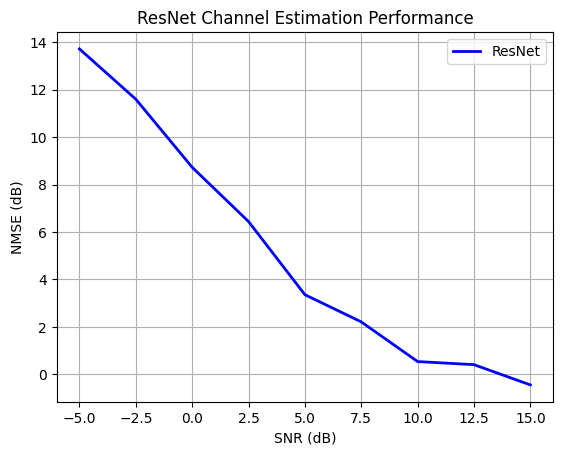

In [ ]:
# NMSE Calculation for Different SNRs
nmse_resnet_array = []
for snr in snr_range:
    signal_power = calculate_signal_power(y)
    # print(y.shape)
    # print(y)
    noise = np.dot(I_Nf_kro_W_RF, np.dot(F_kron_INrRF, generate_noise(snr, signal_power, 32)))
    noise = noise.reshape(32)
    y_snr = y + noise
    # print(y_snr.shape)
    y_snr_real = np.real(y_snr)
    y_snr_imag = np.imag(y_snr)
    y_snr_reshaped = np.stack((y_snr_real, y_snr_imag), axis=1)
    # print(y_snr_reshaped.shape)

    h_pred = resnet(torch.tensor(y_snr_reshaped, dtype=torch.float32)).detach().numpy()


    nmse_resnet_array.append(calculate_nmse(y_tensor.numpy(), h_pred))

# Plot NMSE vs SNR
plt.plot(snr_range, nmse_resnet_array, label='ResNet', color='b', linewidth=2)

plt.xlabel('SNR (dB)')
plt.ylabel('NMSE (dB)')
plt.title('ResNet Channel Estimation Performance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# #Channel Generation....don't run
# h_matrix = []

# for b in range(100):
#   bs_array = PanelArray(num_rows_per_panel = 1,num_cols_per_panel = num_tx, polarization = 'single', polarization_type = 'V',
#                       antenna_pattern = 'omni', carrier_frequency = CF)
#   ut_array = PanelArray(num_rows_per_panel = 1, num_cols_per_panel = num_rx, polarization = 'single', polarization_type = 'V',
#                       antenna_pattern = 'omni',carrier_frequency = CF)
#   h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=3, normalize=True)
#   rg = ResourceGrid(num_ofdm_symbols=1,fft_size=1024,subcarrier_spacing=15e3)
#   cdl = CDL(model="E", delay_spread=DS, carrier_frequency=CF, ut_array = ut_array, bs_array = bs_array, direction = 'uplink')
#   cir_a, cir_tau = cdl(batch_size=1, num_time_steps=1,sampling_frequency=rg.bandwidth)
#   l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
#   l_tot = l_max-l_min+1
#   h_time = cir_to_time_channel(rg.bandwidth, cir_a, cir_tau, l_min=0, l_max=3, normalize=True)
#   C_values=np.zeros((lc,rx,tx),dtype=complex)
#   for k in range(tx):
#     for j in range(rx):
#       for i in range(lc):
#         C_values[i][j][k] = h_time[0][0][k][0][j][0][i]

#   N_f = Nf

#   C_matrix = create_padded_circulant_matrix(C_values, N_f)
#   print(h_time[0][0][0][0][0][0][0])
#   H = np.dot(F_kron_INrRF,C_matrix)
#   H = np.dot(H,FH_kron_INRF_t)

#   h_matrix.append(H)

tf.Tensor((0.93538886+0.012632588j), shape=(), dtype=complex64)
tf.Tensor((0.9524698+0.0011782236j), shape=(), dtype=complex64)
tf.Tensor((1.0262439-0.019320512j), shape=(), dtype=complex64)
tf.Tensor((1.0403054+0.00795569j), shape=(), dtype=complex64)
tf.Tensor((0.9461529+0.012386872j), shape=(), dtype=complex64)
tf.Tensor((0.9684692+0.014105351j), shape=(), dtype=complex64)
tf.Tensor((0.8632653+0.08298545j), shape=(), dtype=complex64)
tf.Tensor((0.95250076-0.004360899j), shape=(), dtype=complex64)
tf.Tensor((0.93190926+0.017468806j), shape=(), dtype=complex64)
tf.Tensor((1.0050831+0.0030876996j), shape=(), dtype=complex64)
tf.Tensor((0.84862614+0.017505743j), shape=(), dtype=complex64)
tf.Tensor((0.8791138-0.015241195j), shape=(), dtype=complex64)
tf.Tensor((0.9854149+0.057735678j), shape=(), dtype=complex64)
tf.Tensor((0.9701685+0.0046493732j), shape=(), dtype=complex64)
tf.Tensor((0.9356781+0.06971605j), shape=(), dtype=complex64)
tf.Tensor((1.0336583+0.09187637j), shape=(), dtype=

In [ ]:
print(I_NF_kro_FRF.shape)
print(I_Nf_kro_W_RF.shape)

(64, 64)
(32, 32)
